# 14 - Files, Interpolation, and Models

## Reading and Writing Files with the Pandas Package
Pandas is a python package that is very helpful in processing data including reading and writing csv files (or other text based files). 

A CSV file is a file that has comma separated values. It is a text file that can be opened in a text editor. For example, the following data in a text file would be a CSV file:

```
Time (s), Concentration (M), Temperature (K)
0, 0.0, 300
1, 0.1, 310
2, 0.2, 320
3, 0.3, 330
```

You could also have a CSV file that has multiple header rows:

```
This is a description of the data in the file that could be multirowed
Time (s), Concentration (M), Temperature (K)
0, 0.0, 300
1, 0.1, 310
2, 0.2, 320
3, 0.3, 330
```

or you could have a text file that has a tab character is used instead of a comma separating the values.


In [1]:
#First import the Pandas Package:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Open a file and add the above data (the one with multiple headers) to it and save it as testdata.csv
# Open the file and read it into a dataframe
df = pd.read_csv('./supportfiles/testdata.csv', sep=',', header=1) # header=1 means that the second row is the header
# a tab separated file would be sep='\t'

In [3]:
# print the first 5 rows of the dataframe
df.head()

,Time (s),Concentration (M),Temperature (K)
0,0,0.0,300
1,1,0.1,310
2,2,0.2,320
3,3,0.3,330


Note that the first column is the index column. The index column is the column that is used to label the rows. You can change the index column to be the time for example as follows:

In [4]:
#return or print the columns of the dataframe
df.columns

Index(['Time (s)', ' Concentration (M)', ' Temperature (K)'], dtype='object')

Note that the column header's have spaces in them. You can remove that space so it's easier to reference them as follows:

In [5]:
#remove spaces from the front of the column headers
df.columns = df.columns.str.strip() # strip the spaces from the front of the column headers

In [6]:
df.columns #notice now the spaces are gone in front of the column headers

Index(['Time (s)', 'Concentration (M)', 'Temperature (K)'], dtype='object')

Referencing a column is done by using the column header name. For example, to get the concentration column, you would use the following:

In [7]:
print(df['Time (s)']) #print the column named Time (s)

0    0
1    1
2    2
3    3
Name: Time (s), dtype: int64


In [8]:
#To get the first value of that column I'd use the following:
print(df['Time (s)'][0],'or', df['Time (s)'].iloc[0], 'or', df.iloc[0]['Time (s)'])

0 or 0 or 0.0


I can add a new column by simply typing the name of the new column and assigning it some values:

In [9]:
df['Location'] = 'Lab' #add a column called Location and set all the values to Lab
df.head()

,Time (s),Concentration (M),Temperature (K),Location
0,0,0.0,300,Lab
1,1,0.1,310,Lab
2,2,0.2,320,Lab
3,3,0.3,330,Lab


You can also write to a csv file as follows:

In [10]:
df.to_csv('./supportfiles/testdataupdated.csv')

Similiar to Numpy having many powerful functions and methods, there are many powerful features of the pandas package. You can read more about it here: https://pandas.pydata.org/. 

### Pandas Example with Vehicle Data
Your vehicle monitors many different variables including the revolutions per minute, gas mileage, oxygen sensors, and catalytic converter temperature (unless you have an electric car) to name a few. You have access to that data as there's an OBD II port likely below your steering wheel. I've collected some data from my 2019 Kia Forte that we'll look at.

In [11]:
# read in the data from the csv file about weather in Ogden Utah
data = pd.read_csv('https://github.com/clint-bg/comptools/blob/main/lectures/supportfiles/kiadata.csv?raw=True')


In [12]:
# prepare data
data['time'] = pd.to_datetime(data['time']) # set time to datetime to help with plotting
data = data.set_index('time') #set index to time

# fill in NaNs as the data for each variable is collected at different times (and so places NaNs in the other columns)
# fill in NaNs - forward fill - fill in missing values with the previous value
data.fillna(method='ffill',inplace=True)
# fill in NaNs - backward fill
data.fillna(method='bfill',inplace=True)

# remove columns that match keywords
for dc in data.columns:
    if ("Average" in dc) or ("(total)" in dc) \
       or ("$" in dc) or ("(mA)" in dc) or ('Unnamed' in dc):
        del data[dc]

/var/folders/6d/1jr2w1qx1rnd2nkndlq4hc700000gn/T/ipykernel_58174/834267956.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['time'] = pd.to_datetime(data['time']) # set time to datetime to help with plotting


In [13]:
# print data columns
for x in data.columns:
    print(x)

# warm-ups since codes cleared ()
Absolute load value (%)
Absolute pedal position D (%)
Absolute pedal position E (%)
Absolute throttle position B (%)
Actual engine - percent torque (%)
Altitude (GPS) (feet)
Ambient air temperature (℉)
Barometric pressure (kPa)
Calculated boost (bar)
Calculated engine load value (%)
Calculated instant fuel consumption (MPG)
Calculated instant fuel rate (gal./h)
Catalyst temperature Bank 1 Sensor 1 (℉)
Catalyst temperature Bank 1 Sensor 2 (℉)
Commanded EGR duty (%)
Commanded evaporative purge (%)
Commanded throttle actuator (%)
Control module voltage (V)
Distance to empty (miles)
Distance traveled since codes cleared (miles)
Distance traveled with MIL on (miles)
Distance travelled (miles)
EGR error (%)
Engine coolant temperature (℉)
Engine Exhaust Flow Rate (g/sec)
Engine Friction - Percent Torque (%)
Engine Fuel Rate (g/sec)
Engine reference torque (N⋅m)
Engine RPM (rpm)
Engine RPM x1000 (rpm)
Evap. system vapor pressure (Pa)
Fuel economizer (based on 

In [14]:
#rename columns
data.rename(columns={'Calculated instant fuel consumption (MPG)':'Calculated MPG'}, inplace=True)

In [15]:
#also reset the data for the calculated MPG to be at most 100 mpg with a lambda function
data['Calculated MPG'] = data['Calculated MPG'].apply(lambda x: 100 if x>100 else x)

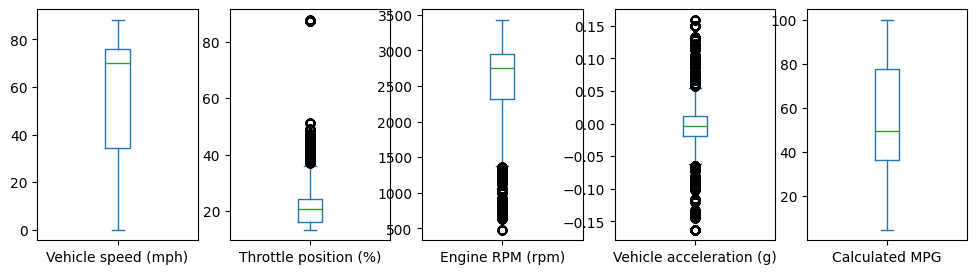

In [16]:
select = ['Vehicle speed (mph)','Throttle position (%)',\
          'Engine RPM (rpm)', 'Vehicle acceleration (g)','Calculated MPG']
data[select].plot(kind='box', subplots=True, figsize=(12,3))
plt.show()

### Pair plot
A pair plot can be helpful to see if any of the variables appear related

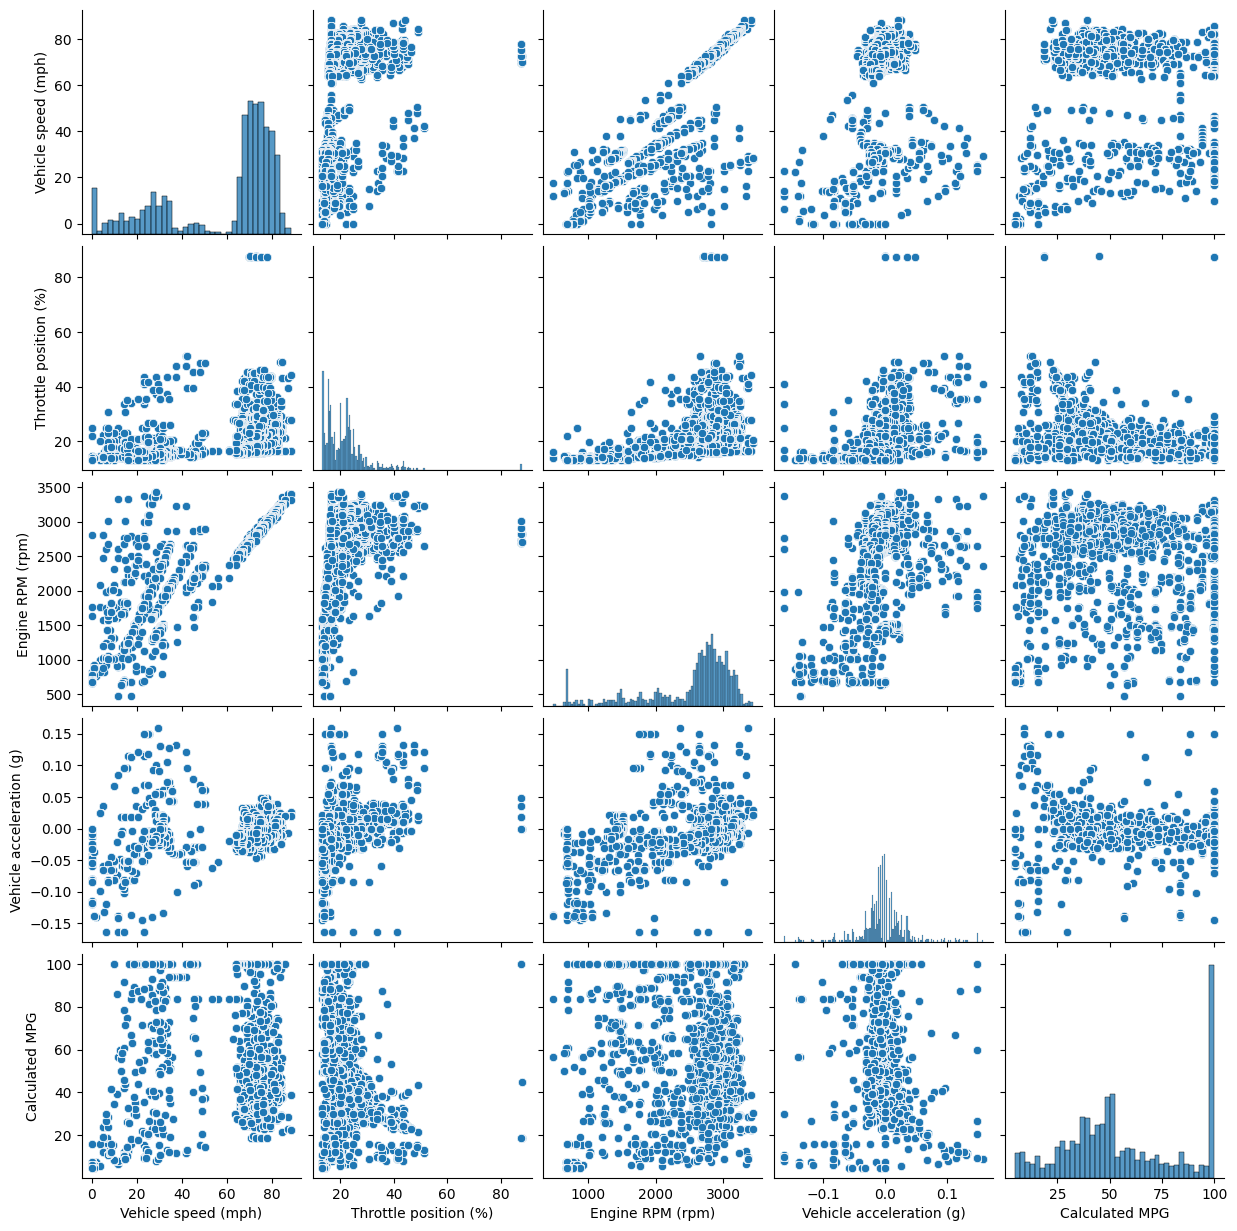

In [17]:
import seaborn as sns
sns.pairplot(data[select])
plt.show()

## Additional Interpolation Examples

Suppose we have a set of data points generted from the Runge function:

In [18]:
def Runge(x):
    return 1/(1+15*x**2)

In [19]:
xvals = np.linspace(-1,1,10)
data_runge = Runge(xvals)

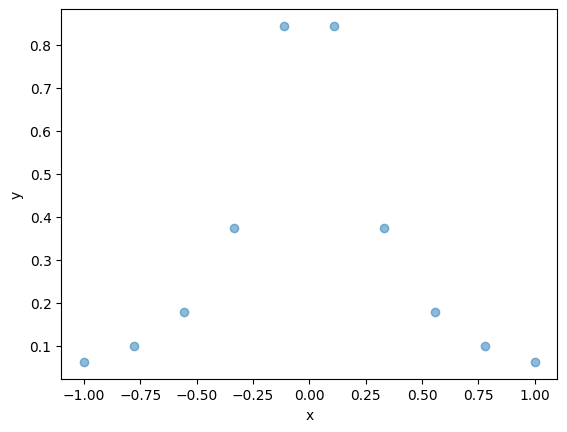

In [20]:
plt.scatter(xvals, data_runge,alpha=0.5)
plt.xlabel('x'); plt.ylabel('y')
plt.show()

In [21]:
data_runge

array([0.0625    , 0.09926471, 0.17763158, 0.375     , 0.84375   ,
       0.84375   , 0.375     , 0.17763158, 0.09926471, 0.0625    ])

Let's use different splining methods to interpolate the data. First, let's use linear interpolation:

In [22]:
#Add a linear interpolation to the data
from scipy.interpolate import interp1d, CubicSpline, BarycentricInterpolator
flin = interp1d(xvals, data_runge)
xis = np.linspace(-1,1,100)

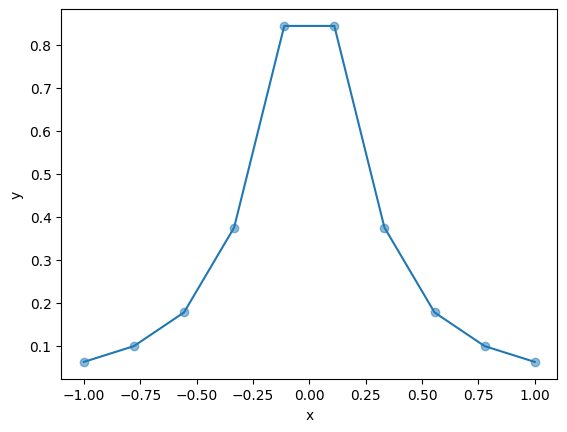

In [23]:
plt.plot(xis, flin(xis))
plt.scatter(xvals, data_runge,alpha=0.5)
plt.xlabel('x'); plt.ylabel('y')
plt.show()

Now lets use cubic interpolation (3 or more points are needed for cubic interpolation as it's a 3rd order or higher polynomial). Barycentric interpolation is a type of cubic interpolation. 

In [24]:
#add cubic interpolation
cs = CubicSpline(xvals, data_runge)
bc = BarycentricInterpolator(xvals, data_runge)

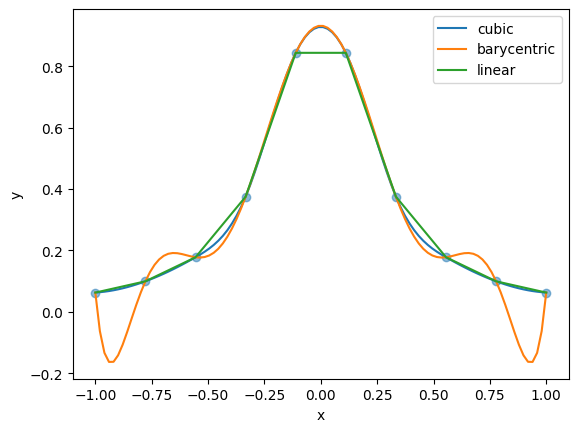

In [25]:
plt.plot(xis, cs(xis), label='cubic')
plt.plot(xis, bc(xis), label='barycentric')
plt.plot(xis, flin(xis),label='linear')
plt.scatter(xvals, data_runge,alpha=0.5)
plt.xlabel('x'); plt.ylabel('y')
plt.legend(); plt.show()

Note that the higher order cubic interpolation can have wide oscillations at the end points. This is called Runge's phenomenon (https://en.wikipedia.org/wiki/Runge%27s_phenomenon).

You can also complete multi-variable interpolation. For example, suppose we have the following data:

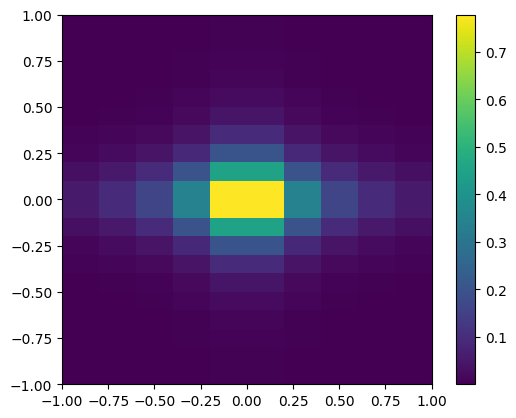

In [26]:
#multivariate interpolation
from scipy.interpolate import griddata
x = np.linspace(-1,1,10)
y = np.linspace(-1,1,20)
xx, yy = np.meshgrid(x,y)
zz = Runge(xx) * Runge(yy)**2

plt.imshow(zz, extent=[-1,1,-1,1], origin='lower')
plt.colorbar()
plt.show()

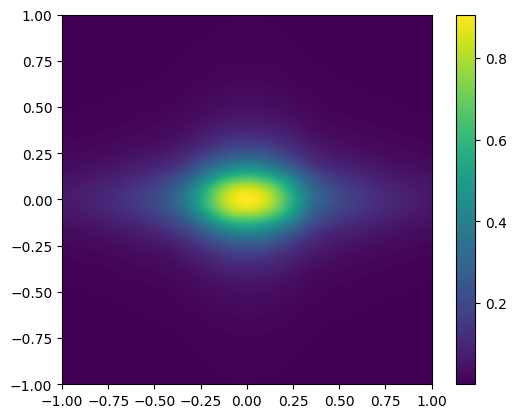

In [27]:
#interpolate the data
xi = np.linspace(-1,1,500)
yi = np.linspace(-1,1,500)
xxi, yyi = np.meshgrid(xi,yi)
zzi = griddata((xx.flatten(), yy.flatten()), zz.flatten(), (xxi, yyi), method='cubic')

plt.imshow(zzi, extent=[-1,1,-1,1], origin='lower')
plt.colorbar()
plt.show()

## Models

Anytime you create a function, you've just created a model. A model relates one thing to another. The variable(s) that you can control is/are the independent variable(s) and the output from the function (or model) is/are the dependent variable(s). There are model's all around us including:
- in your phone, there is a model that relates the voltage of the battery to the percentage of battery life left
- in your car, there is a model that relates the vehicle speed to the amount of fuel used 
- in your refrigerator, there is a model that relates the temperature setting to the temperature inside the refrigerator
- in your phone that relates the destination to the route and time predicted to get there

### Empirical or Theoretical Models

Models can be empirical which is what is typically meant when you complete regression: you fit data collected to an empirical relationship. For example, you might have a set of data that you fit to a linear model. The linear model is an empirical model.

Theoretical models are models that are based on theory. For example, the ideal gas law is a theoretical model. Or for ODE's that we've talked about where we use the balance equations (accum = in - out + gen - cons), the relationship between the independent variables and dependent variables can be based on theory.

From the above description, there are many variables that could be related to each other. For example, the revolutions per minute (RPM) could be related to the gas mileage. The catalytic converter temperature could be related to the oxygen sensor. We'll look at the relationship between the RPM and gas mileage.

### Regression with Statsmodels

#### First Generate Data

In [28]:
def tree_height(w,f):
    return 5*w**2 + (8*f) + np.random.rand(50)*0.1+5

In [29]:
#generate data
tree = dict(water=np.linspace(0,1,50),fertilizer=np.linspace(0,0.5,50))
tree['height'] = tree_height(tree['water'], tree['fertilizer'])
tree = pd.DataFrame(tree)
tree.head()

,water,fertilizer,height
0,0.000000,0.000000,5.009452
1,0.020408,0.010204,5.140229
2,0.040816,0.020408,5.172448
3,0.061224,0.030612,5.292848
4,0.081633,0.040816,5.441169


In [30]:
tree.describe()

,water,fertilizer,height
count,50.000000,50.000000,50.000000
mean,0.500000,0.250000,8.735449
std,0.297498,0.148749,2.702584
min,0.000000,0.000000,5.009452
25%,0.250000,0.125000,6.360636
50%,0.500000,0.250000,8.297108
75%,0.750000,0.375000,10.879230
max,1.000000,0.500000,14.005257


In [31]:
#meshplot the dataa
W, F = np.meshgrid(tree['water'],tree['fertilizer'])
H = tree_height(W,F)

nr, nc = H.shape

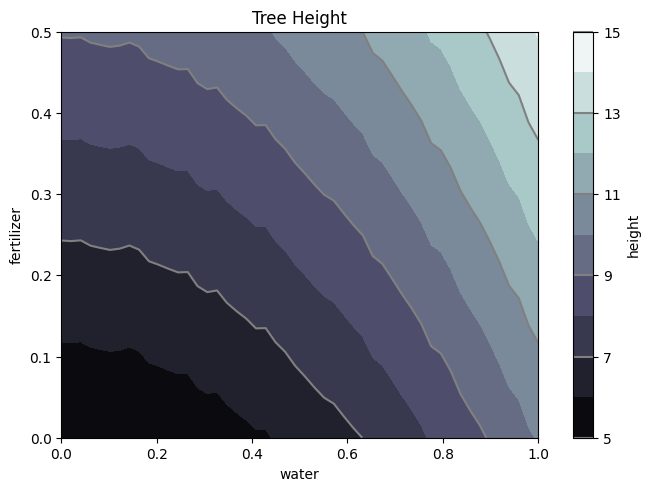

In [32]:
fig1, ax2 = plt.subplots(layout='constrained')
CS = ax2.contourf(W, F, H, 10, cmap=plt.cm.bone)

# Note that in the following, we explicitly pass in a subset of the contour
# levels used for the filled contours.  Alternatively, we could pass in
# additional levels to provide extra resolution, or leave out the *levels*
# keyword argument to use all of the original levels.

CS2 = ax2.contour(CS, levels=CS.levels[::2], colors='gray')

ax2.set_title('Tree Height')
ax2.set_xlabel('water')
ax2.set_ylabel('fertilizer')

# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel('height')
# Add the contour line levels to the colorbar
cbar.add_lines(CS2)

#### Now complete the regression, first with one variable: fertilizer

In [33]:
#Complete the same above task with the statsmodels package
import statsmodels.api as sm
X = tree['fertilizer']
X = sm.add_constant(X)
y = tree['height']
#X = sm.add_constant(X) include this if you want to fit a line with an intercept
model1 = sm.OLS(y, X)
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     2322.
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           2.63e-42
Time:                        18:08:14   Log-Likelihood:                -22.667
No. Observations:                  50   AIC:                             49.33
Df Residuals:                      48   BIC:                             53.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2395      0.108     39.151      0.0

In [34]:
Zp = []; Wf = W.flatten(); Ff = F.flatten()
for i,each in enumerate(Wf):
    Zp.append(results1.params[0] + results1.params[1]*Ff[i])
Zp = np.array(Zp).reshape(50,50)

In [35]:
#Calculate the MAPE
np.mean((np.abs(H.flatten() - Zp.flatten()))/H.flatten())*100

19.601235955284675

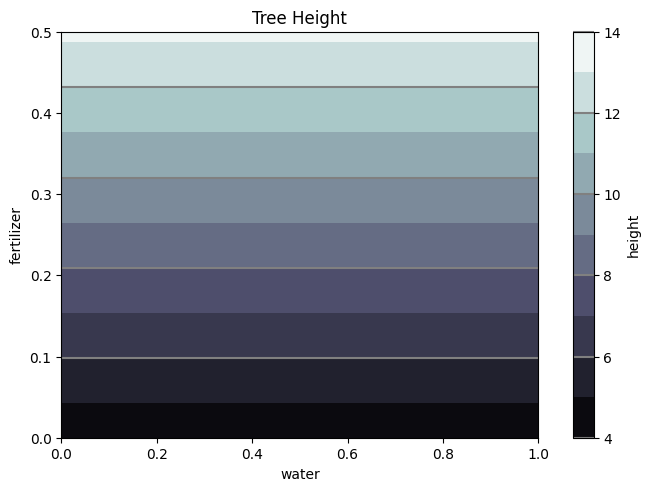

In [36]:
fig1, ax2 = plt.subplots(layout='constrained')
CS = ax2.contourf(W, F, Zp, 10, cmap=plt.cm.bone)

# Note that in the following, we explicitly pass in a subset of the contour
# levels used for the filled contours.  Alternatively, we could pass in
# additional levels to provide extra resolution, or leave out the *levels*
# keyword argument to use all of the original levels.

CS2 = ax2.contour(CS, levels=CS.levels[::2], colors='gray')

ax2.set_title('Tree Height')
ax2.set_xlabel('water')
ax2.set_ylabel('fertilizer')

# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel('height')
# Add the contour line levels to the colorbar
cbar.add_lines(CS2)

#### Now complete the regression with two variables: fertilizer and water

In [37]:
#Complete the same above task with the statsmodels package
import statsmodels.api as sm
X = tree[['water','fertilizer']]
X = sm.add_constant(X)
y = tree['height']
model2 = sm.OLS(y, X)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     2322.
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           2.63e-42
Time:                        18:08:14   Log-Likelihood:                -22.667
No. Observations:                  50   AIC:                             49.33
Df Residuals:                      48   BIC:                             53.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2395      0.108     39.151      0.0

In [38]:
Zp2 = []
for i,each in enumerate(Wf):
    Zp2.append(results2.params[0]+results2.params[1]*Wf[i]+results2.params[2]*Ff[i])
Zp2 = np.array(Zp2).reshape(50,50)

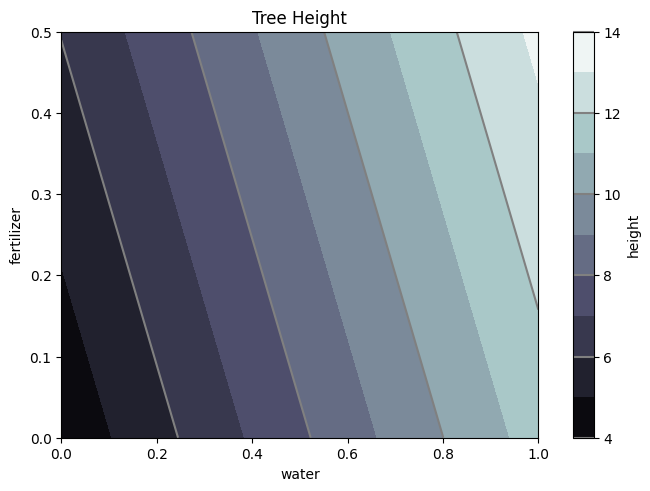

In [39]:
fig1, ax2 = plt.subplots(layout='constrained')
CS = ax2.contourf(W, F, Zp2, 10, cmap=plt.cm.bone)

# Note that in the following, we explicitly pass in a subset of the contour
# levels used for the filled contours.  Alternatively, we could pass in
# additional levels to provide extra resolution, or leave out the *levels*
# keyword argument to use all of the original levels.

CS2 = ax2.contour(CS, levels=CS.levels[::2], colors='gray')

ax2.set_title('Tree Height')
ax2.set_xlabel('water')
ax2.set_ylabel('fertilizer')

# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel('height')
# Add the contour line levels to the colorbar
cbar.add_lines(CS2)

In [40]:
#Calculate the MAPE
np.mean((np.abs(H.flatten() - Zp2.flatten()))/H.flatten())*100

9.93311121200612